In [1]:
import numpy as np
import pandas as pd 
import networkx as nx
import math
import sympy as sp
import matplotlib.pyplot as plt
import gc

from sympy import *
from numpy import linalg as LA
from numpy.linalg import matrix_rank

In [2]:
#Establecer directorio de datos

DIR='/Users/I_am_AlexX/Downloads/Telegram Desktop'
FILE='/adjmatrix_UNS.txt'

file='{}{}'.format(DIR,FILE)

print('File directory:{}'.format(file))

File directory:/Users/I_am_AlexX/Downloads/Telegram Desktop/adjmatrix_UNS.txt


In [15]:
data=pd.read_table(file)

In [4]:
a=np.diag(np.ones(16748),0)
A=data-a

In [5]:
del data

In [6]:
del a

In [14]:
#Este modulo calcula un valor umbral ("threshold") que promedia todos los valores de las 
# entradas de un data set

# Función convertir a lista el resultado de aplicar .mean() a un DataFrame

#def mean_to_list(df):
#    arr=[]
#    for i in range(0,len(df)):
#        a=df.iloc[i]
#        arr.append(a)
#    return arr

# Función para calcular el promedio de las entradas de una lista 

#def cal_prom_en_list(num):
#    sum_num=0
#    for entrada in num:
#        sum_num=sum_num +entrada
        
#    prom = sum_num/len(num)
#    return prom

# Cálculo del umbral, promediando sobre todas las entradas de la matriz de adyacencia

#A_prom_cols=A.mean()
#A_mean_list=mean_to_list(A_prom_cols)
#cal_prom_en_list(A_mean_list)
#threshold=cal_prom_en_list(A_mean_list)



Con el anterior código encontramos que el valor del umbral es 0.08567775225309081, pero en esta nueva versión se encontró una solución alternativa, pues Python no permite hacer el siguiente calculo:

In [7]:
#Se obtiene el mismo resultado 

threshold= A.mean().mean()
threshold

0.08567775225309081

In [8]:
#Función para ver qué forma tiene la matriz del data set que estamos
#estudiando 

def mat_shape(mat,n):
    
    new_data=mat.iloc[:n,:n]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans
    
    
    return simm_mat

In [9]:
#Función para contruir la matriz de grado a partir de la de la matriz de adyacencia

def degree_mat_from_adj(mat,n):
    
    simm_mat = mat_shape(mat, n)
     
    Adj_to_nx=nx.from_numpy_matrix(simm_mat)
    
    L_from_Adj=nx.laplacian_matrix(Adj_to_nx) #obtener la Laplaciana asociada a la de adyacencia
    L_arr=L_from_Adj.toarray()
    L_np=np.matrix(L_arr)
    
    deg_Mat=L_np+simm_mat
    
    return deg_Mat

In [10]:
#La siguiente función sirve para obtener los elementos de la diagonal de la matriz de
# grado y la guarda en un array llamado out_p


def get_elem_in_diag(Mat):
    Mat_mod = np.squeeze(np.asarray(Mat))#convierte numpy matrix en array
    out_p=[]
    for elem in np.nditer(Mat_mod): #nditer itera sobre arrays
        if elem != 0: # omite los valores 0 en el array pues la matriz de grado fuera de la diagonal tiene solo ceros
            out_p.append(int(elem))
            
    return out_p

In [11]:
# El siguiente módulo, crea un array con los primeros "n" genes que deseen obtener del
# Data Frame "data"

#Parametros: data , n 

def get_genes(data,n):
    
    genes_arr = sorted(data) #obtener un array que contiene los elementos del header del DataFrame
    num_genes_extracted = range(n)
    genes = np.array(genes_arr)[num_genes_extracted]
    
    return genes

In [274]:
#Este script es capaz de dibujar el grafo con sus vértices respectivos etiquetados

#Este módulo ha sifo modificado para que sea capaz de etiquetar los nombres de los genes 
#involucrados

def plt_with_label(mat,n):
    
    simm_mat = mat_shape(mat, n)
    
    adj_to_graph=nx.from_numpy_matrix(simm_mat)
    labelmap=dict(zip(adj_to_graph.nodes(),get_genes(data,n)))
    
    plt.figure(1,figsize=(20,20))
    
    nx.draw(adj_to_graph, labels=labelmap, with_labels=True,
    font_size=15,font_weight='bold',font_color='black',edge_color='gray',node_color='green',node_size=200)
    
    graph_with_lab=plt.show()
    
    return graph_with_lab

In [13]:
#Función para obtener el número mayor de una lista de números dentro de un array

def func(a,N):
    return np.argsort(a)[::-1][:N]


In [25]:
get_elem_in_diag( degree_mat_from_adj(A,3))

[2, 2, 2]

In [21]:
mat_shape(A,3)

matrix([[0., 1., 1.],
        [1., 0., 1.],
        [1., 1., 0.]])

In [ ]:
# Para obtener la matriz que nos revelará aquellos genes que tienen mayores conexiones con vértices que tienen 
# un alto valor en su grado multiplicaremos la matriz de adyacencia por el vector de grado 

In [44]:
mat_shape(A,5).dot(get_elem_in_diag( degree_mat_from_adj(A,5)))

matrix([[12., 12., 11.,  8., 11.]])

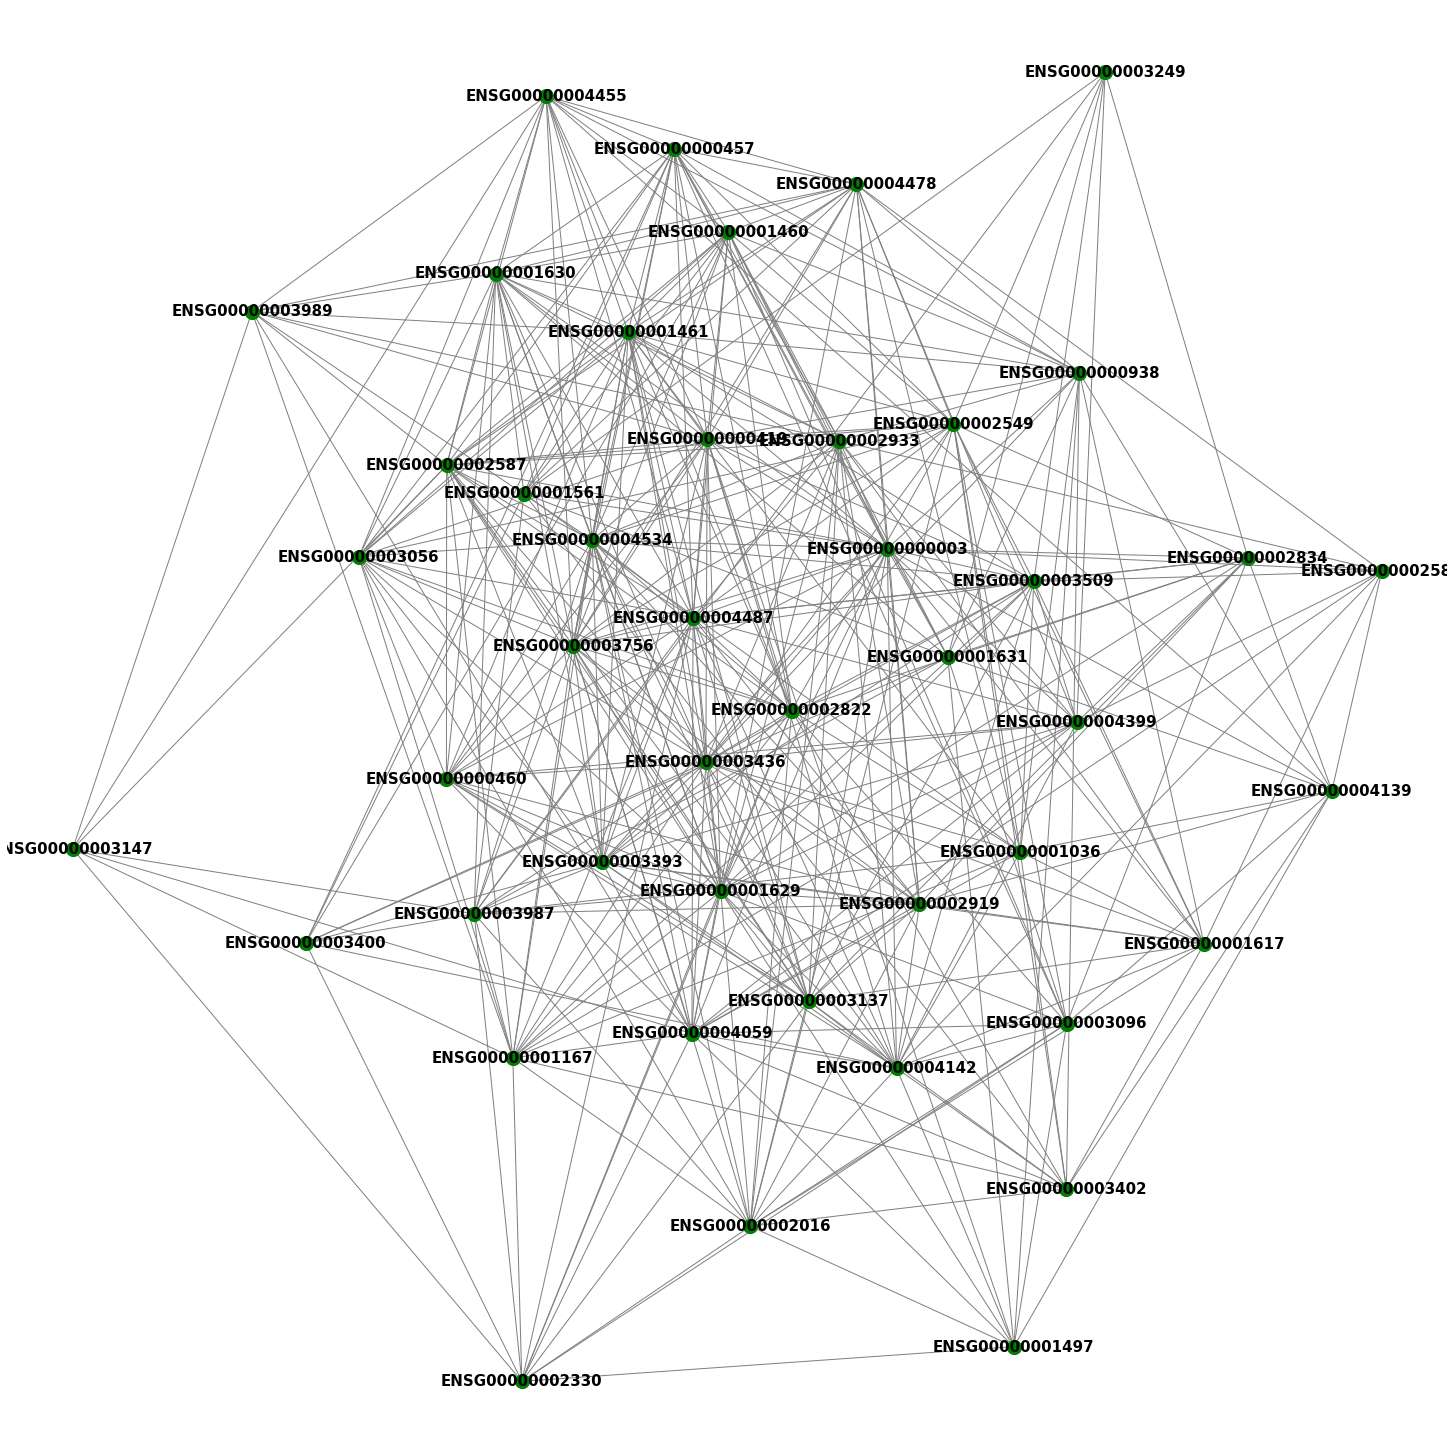

In [298]:
plt_with_label(A,45)

In [62]:
func(mat_shape(A,5).dot(get_elem_in_diag( degree_mat_from_adj(A,5))),5)

matrix([[3, 2, 4, 0, 1]], dtype=int64)

In [64]:
mat_shape(A,5).dot(get_elem_in_diag( degree_mat_from_adj(A,5)))

matrix([[12., 12., 11.,  8., 11.]])

In [53]:
get_genes(data,5)[1]

'ENSG00000000419'

In [54]:
mat_shape(A,5).dot(get_elem_in_diag( degree_mat_from_adj(A,5)))

matrix([[12., 12., 11.,  8., 11.]])

In [55]:
mat_shape(A,5)

matrix([[0., 1., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 1., 0., 0., 1.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.]])

In [56]:
get_elem_in_diag( degree_mat_from_adj(A,5))

[4, 4, 3, 2, 3]

In [57]:
get_genes(data,5)[3]

'ENSG00000000460'

In [58]:
get_genes(data,5)[2]

'ENSG00000000457'

In [24]:
get_genes(data,5)[4]

'ENSG00000000938'

In [19]:
get_genes(data,5)[1]

'ENSG00000000419'

In [18]:
get_genes(data,5)[0]

'ENSG00000000003'

In [17]:
(-mat_shape(A,5).dot(get_elem_in_diag( degree_mat_from_adj(A,5)))).argsort()[:5]

matrix([[0, 1, 2, 4, 3]], dtype=int64)

In [23]:
func(get_elem_in_diag(degree_mat_from_adj(A,5)),5)

array([1, 0, 4, 2, 3], dtype=int64)

In [20]:
get_elem_in_diag(degree_mat_from_adj(A,5))

[4, 4, 3, 2, 3]